In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img = cv2.imread("src/img/lena.png")

def cv_show(img, name='img'):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    cv2.waitKey(1)

### 直方图

In [3]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])
hist.shape

(256, 1)

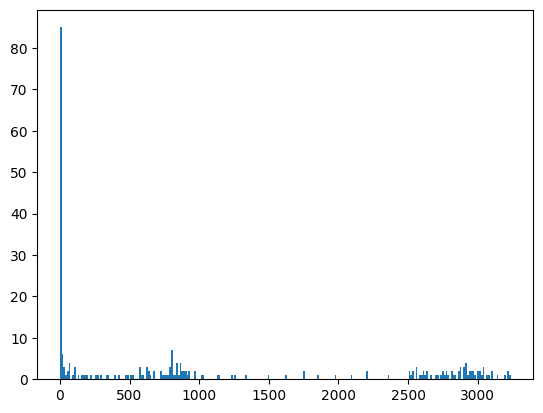

In [5]:
plt.hist(hist.ravel(),256)
plt.show()

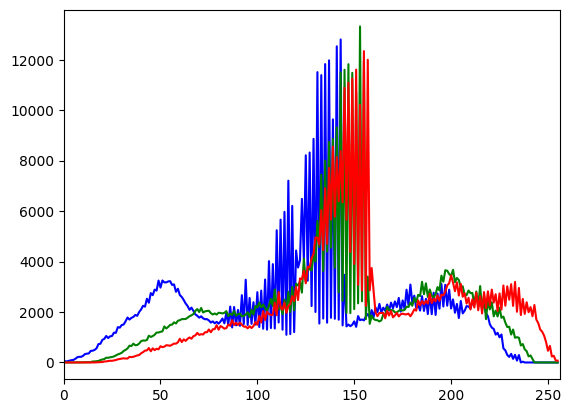

In [6]:
cat = cv2.imread("src/img/cat.jpg")
color = ('b','g','r')
for i, col in enumerate(color):
    histr = cv2.calcHist([cat],[i],None,[256],[0,256])
    plt.plot(histr,color=col)
    plt.xlim([0,256])

mask操作

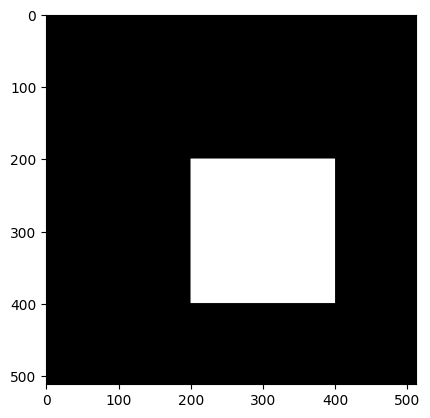

In [15]:
mask = np.zeros(img.shape[:2],np.uint8)
mask[200:400,200:400] = 255
plt.imshow(mask,cmap='gray')

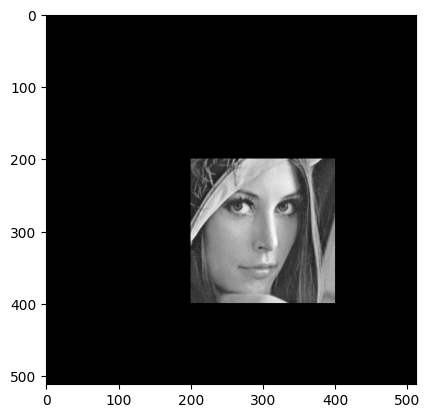

In [16]:
img_copy = cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY)
img_mask = cv2.bitwise_and(img_copy, img_copy, mask=mask)
plt.imshow(img_mask,cmap='gray')

直方图均衡化

(<AxesSubplot:title={'center':'img'}>,
 (array([  11.,   65.,  111.,  164.,  261.,  315.,  431.,  537.,  682.,
          847.,  912., 1074., 1350., 1480., 1681., 1621., 2064., 1835.,
         2048., 1989., 1911., 2258., 2129., 1748., 1776., 1850., 1687.,
         1605., 1661., 1355., 1360., 1189., 1278., 1062., 1027., 1052.,
         1084., 1013., 1029.,  917.,  933., 1043., 1037., 1069.,  942.,
         1218., 1194., 1116., 1467., 1410., 1699., 1855., 2139., 2538.,
         2906., 2886., 3475., 3856., 4072., 4367., 5009., 4701., 4951.,
            0., 4621., 4982., 4648., 4776., 4705., 4988., 4705., 4994.,
         4819., 5065., 5176., 5000., 5146., 5320., 5003., 5346., 5141.,
         5615., 5167., 5486., 5742., 5831., 6199., 6261., 6087., 6566.,
         6738., 6420., 6610., 6534., 6723., 6568., 5833., 6461., 5798.,
         5813., 5598., 5862., 5370., 5456., 4938., 5066., 5089., 4884.,
         4878., 4835., 5034., 4968., 4713., 5150., 4947., 5049., 5063.,
         5165., 5231., 53

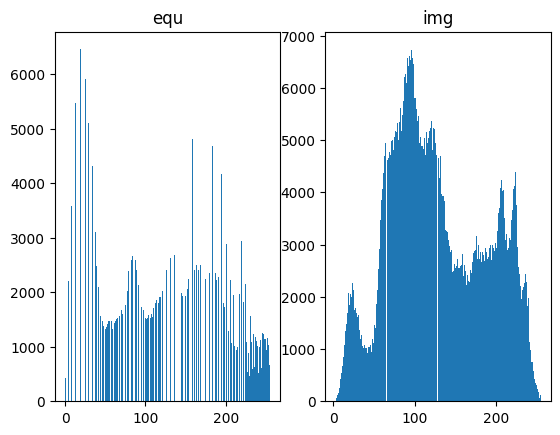

In [21]:
img_gray = cv2.imread('src/img/lena.png',cv2.IMREAD_GRAYSCALE)
equ = cv2.equalizeHist(img_gray)
plt.subplot(1,2,1), plt.hist(equ.ravel(),256),plt.title('equ')
plt.subplot(1,2,2), plt.hist(img.ravel(),256),plt.title('img')

自适应直方图均衡化

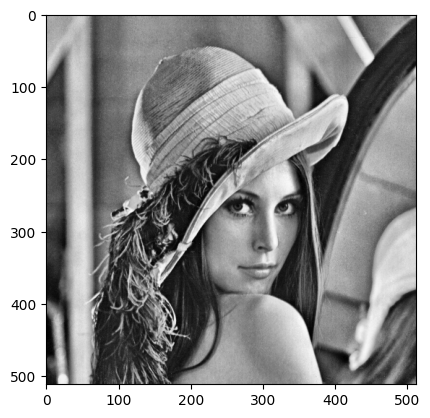

In [24]:
clahe = cv2.createCLAHE(2.0, (8,8))
res_clahe = clahe.apply(img_gray)
plt.imshow(res_clahe,cmap='gray')

### 傅里叶变换

- 高频：变化剧烈，例如边界
- 低频：变化缓慢，例如一片大海

#### 滤波

- 低通滤波器：只保留低频，会使图像模糊
- 高通滤波器：只保留高频，会使图像细节增强

(<AxesSubplot:title={'center':'magnitude'}>,
 Text(0.5, 1.0, 'magnitude'))

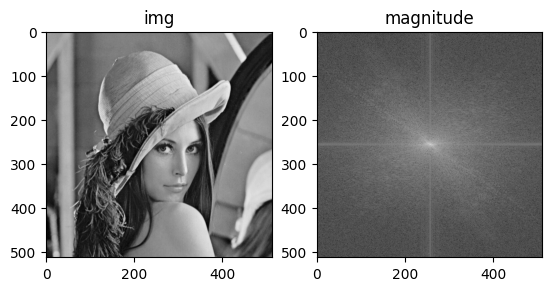

In [26]:
img_float = np.float32(img_gray)

dft = cv2.dft(img_float,flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(1,2,1), plt.imshow(img_gray,cmap='gray'),plt.title('img')
plt.subplot(1,2,2), plt.imshow(magnitude,cmap='gray'),plt.title('magnitude')

(<AxesSubplot:title={'center':'img_back'}>,
 Text(0.5, 1.0, 'img_back'))

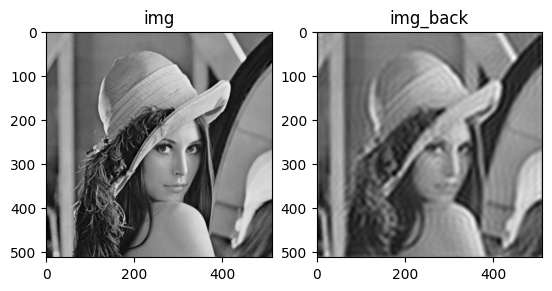

In [29]:
rows,cols = img_gray.shape
crow, ccol = int(rows/2),int(cols/2) # 中心位置

# 低通滤波
mask = np.zeros((rows, cols, 2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] = 1

# IDFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121), plt.imshow(img_gray,cmap='gray'),plt.title('img')
plt.subplot(122), plt.imshow(img_back,cmap='gray'),plt.title('img_back')

(<AxesSubplot:title={'center':'img_back'}>,
 Text(0.5, 1.0, 'img_back'))

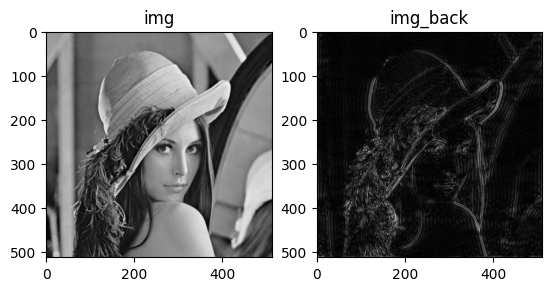

In [33]:
rows,cols = img_gray.shape
crow, ccol = int(rows/2),int(cols/2) # 中心位置

# 高通滤波
mask = np.ones((rows, cols, 2),np.uint8)
mask[crow-30:crow+30,ccol-30:ccol+30] = 0

# IDFT
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121), plt.imshow(img_gray,cmap='gray'),plt.title('img')
plt.subplot(122), plt.imshow(img_back,cmap='gray'),plt.title('img_back')